In [1]:
import numpy as np
import pandas as pd
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)
import matplotlib.pyplot as plt
import matplotlib
 
# DataSource
# https://www.kaggle.com/imdevskp/corona-virus-report/data#
    
file = 'covid_19_clean_complete.csv';

df1 = pd.read_csv(file,parse_dates=True);
%matplotlib inline


In [2]:
#1  First step is have a look at data set 
#1.1 what are all the columns available  
df1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered'],
      dtype='object')

In [3]:
#1.2  Datatype for each column
df1.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed           int64
Deaths              int64
Recovered           int64
dtype: object

In [4]:
#1.3 Data ranges . It doesnt makes sense for Lat ,Long , but for Confirmed , Deaths and Recovered it gives a sense 
df1.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,24890.000000,24890.000000,24890.000000,24890.000000,24890.000000
mean,21.433571,22.597991,2336.763198,141.207915,580.246605
std,24.740917,70.570914,22688.167259,1499.521732,5021.307422
min,-51.796300,-135.000000,-1.000000,-1.000000,0.000000
25%,7.000000,-19.020800,0.000000,0.000000,0.000000
50%,23.659750,20.921188,5.000000,0.000000,0.000000
75%,41.204400,81.000000,176.000000,2.000000,16.000000
max,71.706900,178.065000,938154.000000,53755.000000,109800.000000


In [5]:
#Lattitude and Longitude are not required for analysis. Let me remove them 
df1 = df1.drop(columns=['Lat'])
df1.describe()

,Long,Confirmed,Deaths,Recovered
count,24890.000000,24890.000000,24890.000000,24890.000000
mean,22.597991,2336.763198,141.207915,580.246605
std,70.570914,22688.167259,1499.521732,5021.307422
min,-135.000000,-1.000000,-1.000000,0.000000
25%,-19.020800,0.000000,0.000000,0.000000
50%,20.921188,5.000000,0.000000,0.000000
75%,81.000000,176.000000,2.000000,16.000000
max,178.065000,938154.000000,53755.000000,109800.000000


In [6]:
#Another method of dropping columns
df1 = df1.drop(['Long'],axis=1)
#Look at the actual values . its similar to Cat file | head 
df1.head(5)

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,1/22/20,0,0,0
1,NaN,Albania,1/22/20,0,0,0
2,NaN,Algeria,1/22/20,0,0,0
3,NaN,Andorra,1/22/20,0,0,0
4,NaN,Angola,1/22/20,0,0,0


In [7]:
df1.tail(5)


,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
24885,Saint Pierre and Miquelon,France,4/25/20,1,0,0
24886,NaN,South Sudan,4/25/20,5,0,0
24887,NaN,Western Sahara,4/25/20,6,0,5
24888,NaN,Sao Tome and Principe,4/25/20,4,0,0
24889,NaN,Yemen,4/25/20,1,0,0


In [8]:
#How many rows 
df1.shape

(24890, 6)

In [9]:
df1.size

149340

In [10]:
#How manu unique countries/Region and Province/States are there
# 2 formats for refering to the column. How use the column name with special characters.
df1['Country/Region'].nunique()


185

In [11]:
#first row
df1.iloc[1]

Province/State        NaN
Country/Region    Albania
Date              1/22/20
Confirmed               0
Deaths                  0
Recovered               0
Name: 1, dtype: object

In [12]:
#Filter only India's data and list the recent 5 rows
df_india = df1[df1['Country/Region'] == 'India']
df_india.tail(5)

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered
23711,NaN,India,4/21/20,20080,645,3975
23973,NaN,India,4/22/20,21370,681,4370
24235,NaN,India,4/23/20,23077,721,5012
24497,NaN,India,4/24/20,24530,780,5498
24759,NaN,India,4/25/20,26283,825,5939


In [13]:
# Convert the Date into DateTime datastructure
# Make the new column as the index
df_india.loc[:,'Date']=pd.to_datetime(df_india['Date']);
df_india.dtypes
#Note the change in Date from earlier describe

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Province/State            object
Country/Region            object
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [14]:
df_india = df_india.set_index('Date')
df_india.tail(5)

,Province/State,Country/Region,Confirmed,Deaths,Recovered
Date,,,,,
2020-04-21,NaN,India,20080,645,3975
2020-04-22,NaN,India,21370,681,4370
2020-04-23,NaN,India,23077,721,5012
2020-04-24,NaN,India,24530,780,5498
2020-04-25,NaN,India,26283,825,5939


Text(0, 0.5, 'No of confirmed Cases')

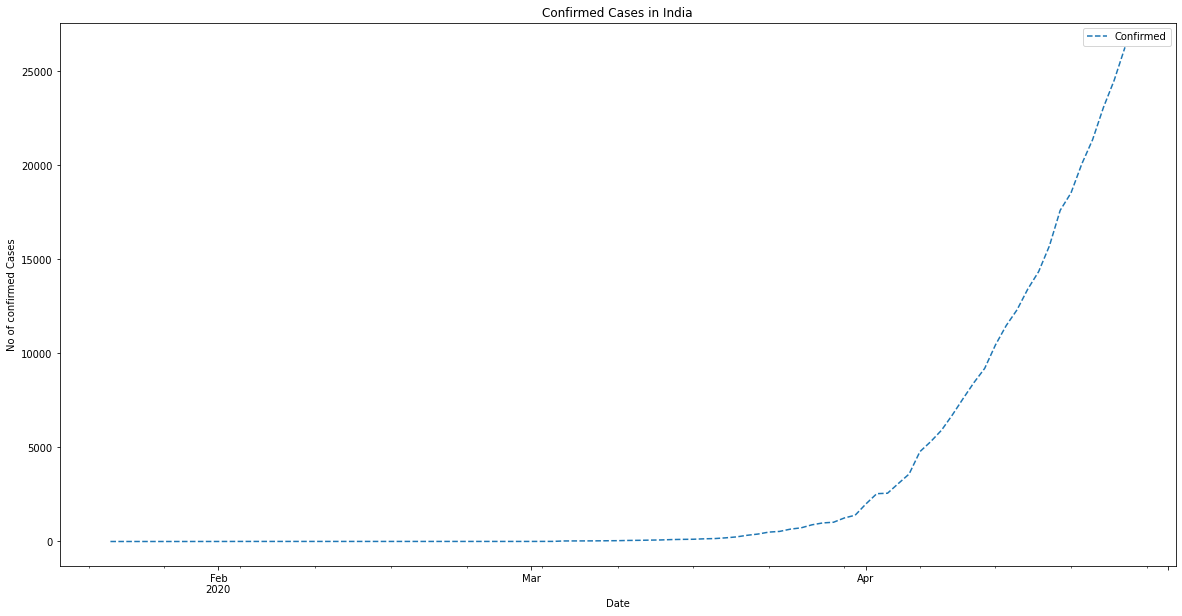

In [15]:
#Plot a line chart of confirmed cases in India 
ax = df_india['Confirmed'].plot(figsize=(20,10),title="Confirmed Cases in India",legend=True,linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('No of confirmed Cases')

Text(0, 0.5, 'No of Deaths')

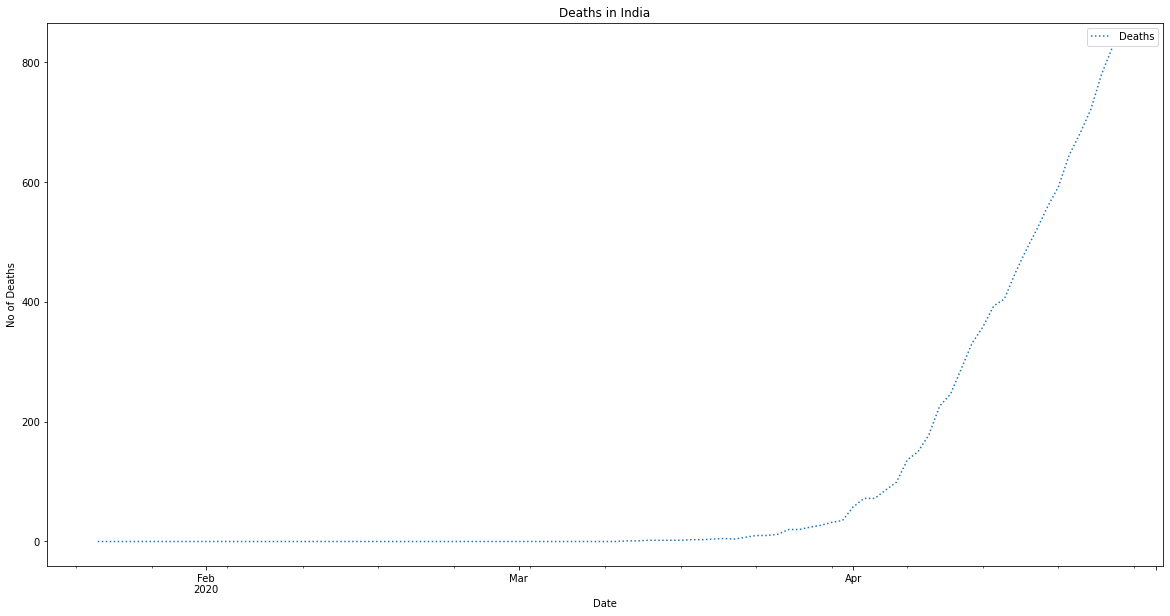

In [16]:
#Plot a line chart of confirmed cases in India 
ax = df_india['Deaths'].plot(figsize=(20,10),title="Deaths in India",legend=True,linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('No of Deaths')

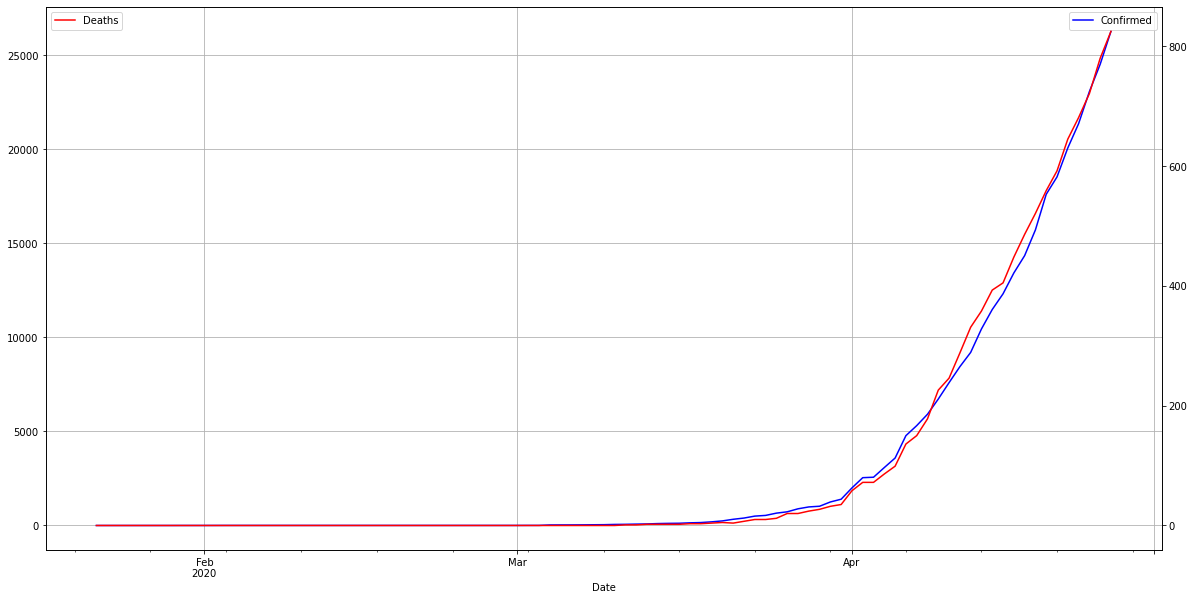

In [17]:
#Confirmed cases and deaths have different Scale 
#Plotting them . Can we plot them together to 2 Y-axis scales.

plt.figure(figsize=(20,10))
plt.xlabel('Number of requests every 10 minutes')

ax1 = df_india.Confirmed.plot(color='blue', grid=True, label='Confirmed')
ax2 = df_india.Deaths.plot(color='red', grid=True, secondary_y=True, label='Deaths')

ax1.legend(loc=1)
ax2.legend(loc=2)

plt.show()


In [18]:
#Converting Date as datetime. Note the change in datatype
df1['Date'] = pd.to_datetime(df1['Date'])
df1.dtypes

Province/State            object
Country/Region            object
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

In [19]:
#Fine the latest date in the dataset
max_date = df1['Date'].max()
max_date

Timestamp('2020-04-25 00:00:00')

In [20]:
#Create a new dataframe with only values on the last date.
df_lastday = df1[df1['Date']==max_date]
df_lastday.shape

(262, 6)

In [21]:
# Need to identify the countries which have most infections 
# Reshape the dataframe to the format ( Country Vs Confirmed cases ; as on last day)
# Top 20 countries are the one which we are interested in 
top_countries_df = pd.pivot_table(df_lastday,index='Country/Region', values='Confirmed',aggfunc=np.sum)\
.sort_values(by='Confirmed',ascending=False).head(20)
top_countries_df

,Confirmed
Country/Region,
US,938154
Spain,223759
Italy,195351
France,161644
Germany,156513
United Kingdom,149569
Turkey,107773
Iran,89328
China,83909


In [22]:
# Get the index of the new dataframe and convert it into a list 
top_countries_list = top_countries_df.index

In [23]:
#Group by Date and Country ; sum up all sub-area,county etc
df_grouped_date = df1.groupby(['Date','Country/Region']).Deaths.sum()
df_grouped_date.head(5)
#Note the structure of data below

Date        Country/Region
2020-01-22  Afghanistan       0
            Albania           0
            Algeria           0
            Andorra           0
            Angola            0
Name: Deaths, dtype: int64

In [24]:
#Group by Country and Date ; sum up all sub-area,county etc
df_grouped_confirmed = df1.groupby(['Country/Region','Date']).Confirmed.sum()
df_grouped_confirmed.tail(5)
#Note the structure of data below and compare it with earlier

Country/Region  Date      
Zimbabwe        2020-04-21    28
                2020-04-22    28
                2020-04-23    28
                2020-04-24    29
                2020-04-25    31
Name: Confirmed, dtype: int64

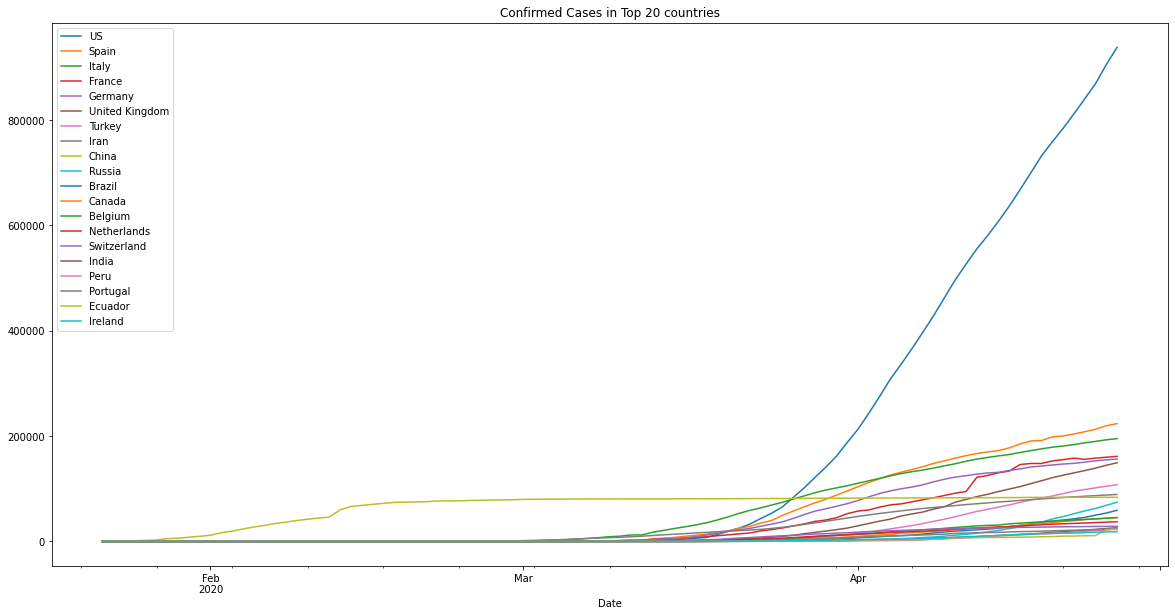

In [25]:
for country in top_countries_list:
    df_grouped_confirmed[country].plot.line(label= country,figsize=(20,10),\
                legend=True,title="Confirmed Cases in Top 20 countries" )

#Time series line plot of cumulative confirmed cases in top 20 countries    

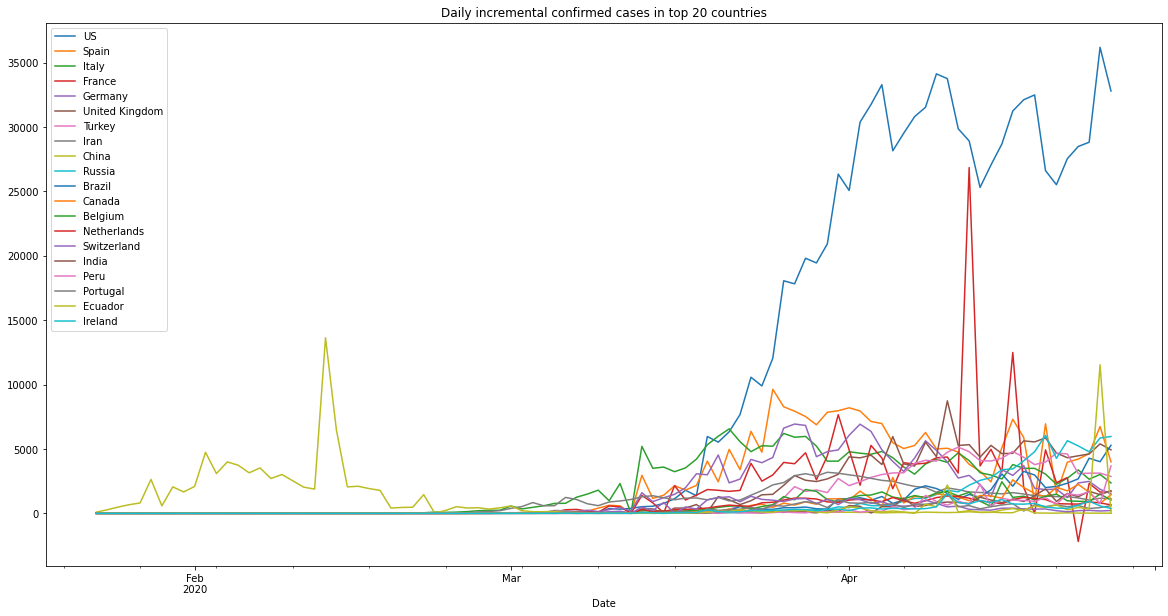

In [26]:
#In this usecase lot of importance is around the cases newly confirmed each day 
#.diff() calculates the difference of nth and n-1 th rows ie) newly added cases 
for country in top_countries_list:
    df_grouped_confirmed[country].diff().plot.line(label= country,figsize=(20,10),\
                legend=True,title="Daily incremental confirmed cases in top 20 countries" )
    
#Time series line plot of daily increases in confirmed cases in top 10 cases    

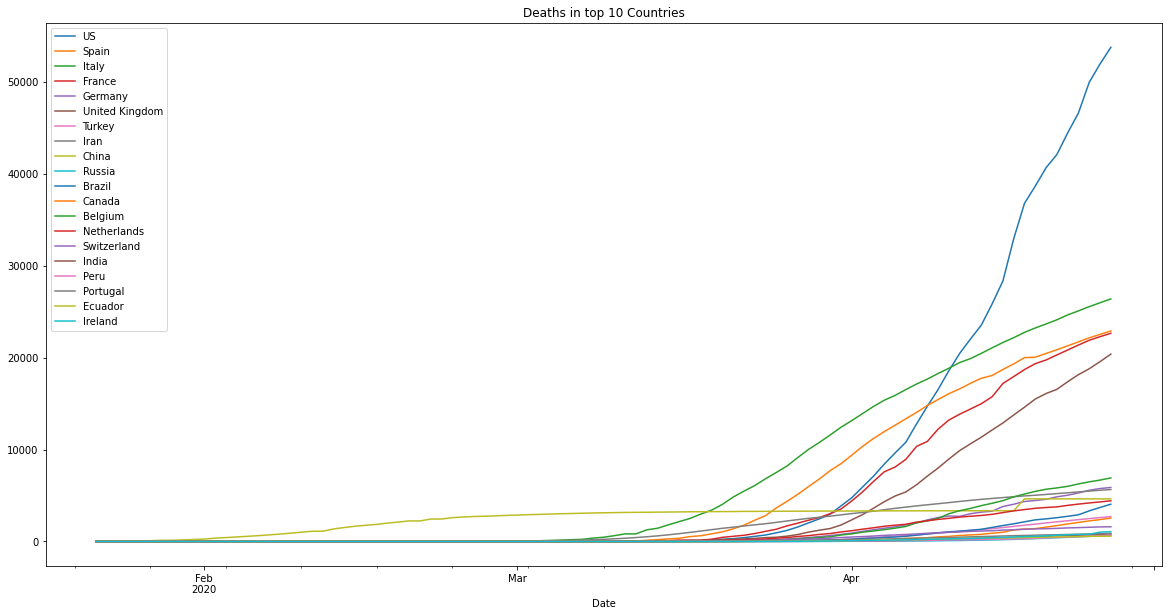

In [27]:
#Group by Country and then by Date on the Deaths
df_grouped_death = df1.groupby(['Country/Region','Date']).Deaths.sum()
for country in top_countries_list:
    df_grouped_death[country].plot.line(label= country,figsize=(20,10),legend=True,\
                title="Deaths in top 10 Countries")
#Time series line plot of cumulative deaths in each of top 10 countries    

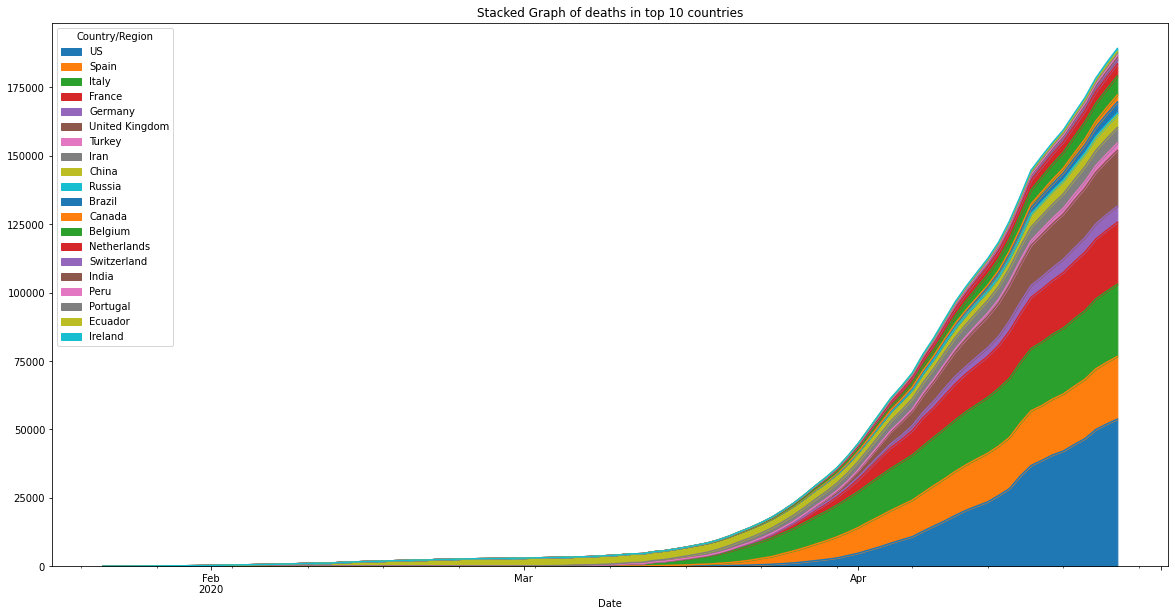

In [28]:
df2 = pd.pivot_table(df1,values='Deaths',index='Date',columns='Country/Region'\
                     ,aggfunc=np.sum);
#df2[top_countries_list].plot.area(figsize=(20,10),legend=True)
top = pd.Index.tolist(top_countries_list)
df2[top].plot.area(figsize=(20,10),title="Stacked Graph of deaths in top 10 countries")

#Charting total death as a stacked line chart in Top 10 countries

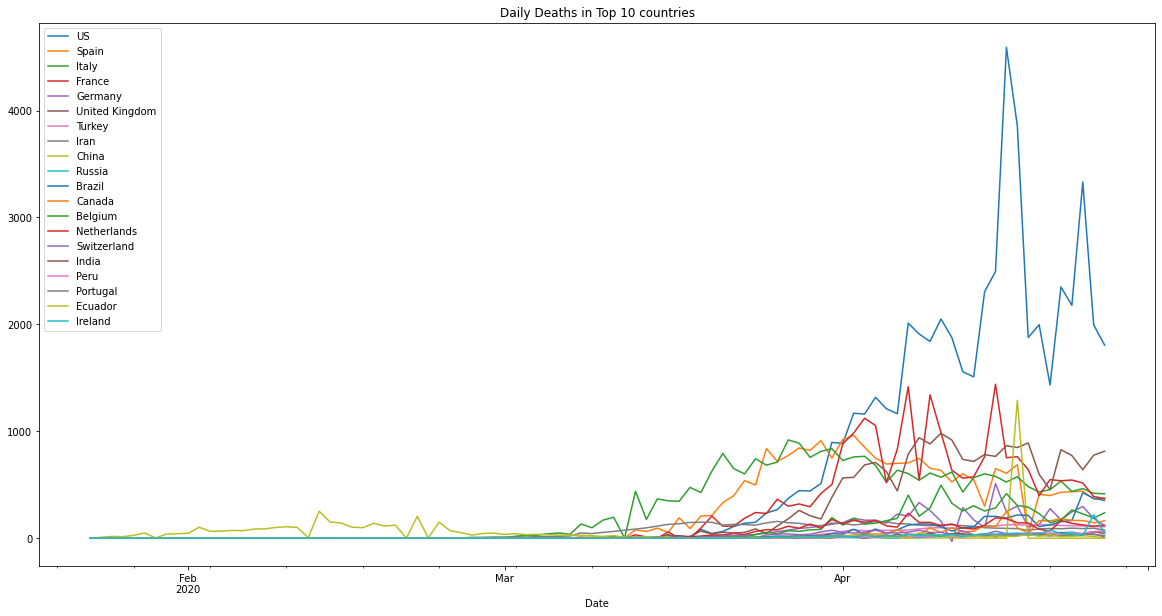

In [29]:

for country in top_countries_list:
    df_grouped_death[country].diff().plot.line(label= country,figsize=(20,10),legend=True,\
                    title="Daily Deaths in Top 10 countries")
#Time series line plot of daily increases in death in top 10 cases    

In [30]:
#Reshaping the data such that Date vs Country for Deaths 
df_pivot_countries_death = df1.pivot_table(values=['Deaths'],index=['Date'],columns='Country/Region',aggfunc=np.sum)
df_pivot_countries_death.tail(5)

Deaths                                                     \
Country/Region Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
Date                                                                            
2020-04-21              36      26     392      37      2                   3   
2020-04-22              40      27     402      37      2                   3   
2020-04-23              42      27     407      37      2                   3   
2020-04-24              43      27     415      40      2                   3   
2020-04-25              47      27     419      40      2                   3   

                                                     ...                    \
Country/Region Argentina Armenia Australia Austria   ...    United Kingdom   
Date                                                 ...                     
2020-04-21           147      24        67     491   ...             17378   
2020-04-22           152      24        67     510   ...             18151   
2020-04-23           165      24        75     522   ...             18791   
2020-04-24           176      27        79     530   ...             19567   
2020-04-25           185      28        80     536   ...             20381   

                                                                        \
Country/Region Uruguay Uzbekistan Venezuela Vietnam West Bank and Gaza   
Date                                                                     
2020-04-21          11          6        10       0                  4   
2020-04-22          12          7        10       0                  4   
2020-04-23          12          7        10       0                  4   
2020-04-24          12          8        10       0                  4   
2020-04-25          14          8        10       0                  2   

                                                     
Country/Region Western Sahara Yemen Zambia Zimbabwe  
Date                                                 
2020-04-21                  0     0      3        3  
2020-04-22                  0     0      3        4  
2020-04-23                  0     0      3        4  
2020-04-24                  0     0      3        4  
2020-04-25                  0     0      3        4  

[5 rows x 185 columns]

In [31]:
#Remove the additional column 
df_pivot_countries_death.columns = df_pivot_countries_death.columns.droplevel(0)
df_pivot_countries_death.tail(5)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-21,36,26,392,37,2,3,147,24,67,491,...,17378,11,6,10,0,4,0,0,3,3
2020-04-22,40,27,402,37,2,3,152,24,67,510,...,18151,12,7,10,0,4,0,0,3,4
2020-04-23,42,27,407,37,2,3,165,24,75,522,...,18791,12,7,10,0,4,0,0,3,4
2020-04-24,43,27,415,40,2,3,176,27,79,530,...,19567,12,8,10,0,4,0,0,3,4
2020-04-25,47,27,419,40,2,3,185,28,80,536,...,20381,14,8,10,0,2,0,0,3,4


In [32]:
#df_pivot_countries_death.columns
#df_pivot_countries_death.index

In [33]:
#Get the daily increment in the same format
df_pivot_countries_death_diff = df_pivot_countries_death.diff()
df_pivot_countries_death_diff[top_countries_list.tolist()].tail(10)

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,Turkey,Iran,China,Russia,Brazil,Canada,Belgium,Netherlands,Switzerland,India,Peru,Portugal,Ecuador,Ireland
Date,,,,,,,,,,,,,,,,,,,,
2020-04-16,4592.0,607.0,525.0,753.0,248.0,865.0,125.0,92.0,0.0,34.0,188.0,251.0,417.0,182.0,42.0,43.0,20.0,30.0,15.0,42.0
2020-04-17,3857.0,687.0,575.0,762.0,300.0,848.0,126.0,89.0,1290.0,41.0,217.0,97.0,306.0,144.0,46.0,38.0,26.0,28.0,18.0,44.0
2020-04-18,1877.0,41.0,482.0,642.0,107.0,891.0,121.0,73.0,0.0,40.0,213.0,45.0,290.0,142.0,41.0,35.0,48.0,30.0,35.0,41.0
2020-04-19,1997.0,410.0,433.0,399.0,127.0,597.0,127.0,87.0,0.0,48.0,108.0,164.0,230.0,84.0,25.0,38.0,52.0,27.0,18.0,39.0
2020-04-20,1433.0,399.0,454.0,548.0,276.0,455.0,123.0,91.0,0.0,44.0,125.0,162.0,145.0,67.0,36.0,33.0,45.0,21.0,33.0,77.0
2020-04-21,2350.0,430.0,534.0,537.0,171.0,828.0,119.0,88.0,0.0,51.0,154.0,183.0,170.0,165.0,49.0,53.0,39.0,27.0,13.0,43.0
2020-04-22,2178.0,435.0,437.0,544.0,246.0,773.0,117.0,94.0,0.0,57.0,165.0,167.0,264.0,139.0,31.0,36.0,46.0,23.0,17.0,39.0
2020-04-23,3332.0,440.0,464.0,516.0,296.0,640.0,115.0,90.0,0.0,42.0,425.0,165.0,228.0,124.0,40.0,40.0,42.0,35.0,23.0,25.0
2020-04-24,1995.0,367.0,420.0,390.0,185.0,776.0,109.0,93.0,0.0,60.0,373.0,144.0,189.0,112.0,40.0,59.0,62.0,34.0,16.0,220.0


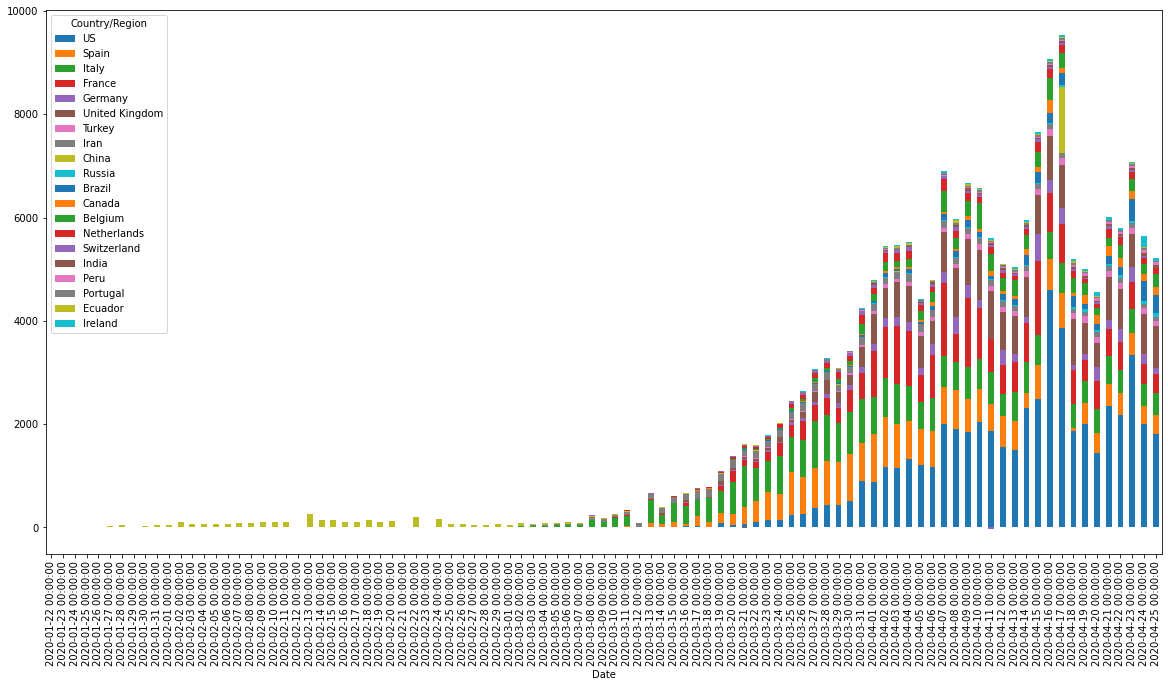

In [34]:
#Time series stacked bar plot of daily increases in death in top 10 countries
df_pivot_countries_death_diff[top_countries_list.tolist()].plot.bar(stacked=True,figsize=(20,10))

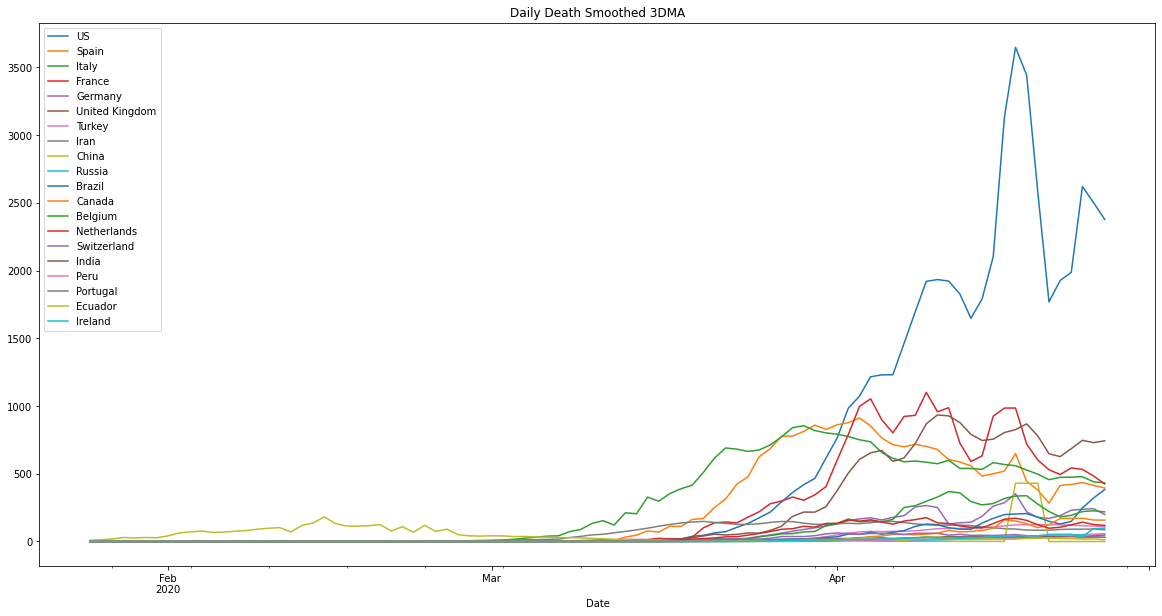

In [35]:
# Daily charts are very volatile . Curve can be smoothed by calculating moving averages.
#3 Day moving average of Death.
for country in top_countries_list:
    df_grouped_death[country].diff().rolling(3).mean().plot.line(label= country,\
                            figsize=(20,10),legend=True,title="Daily Death Smoothed 3DMA")
                                                            
#Time series line plot of daily increases in death in top 10 cases- smoothed - 3 Day Moving Average - 3DMA   

/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.7/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

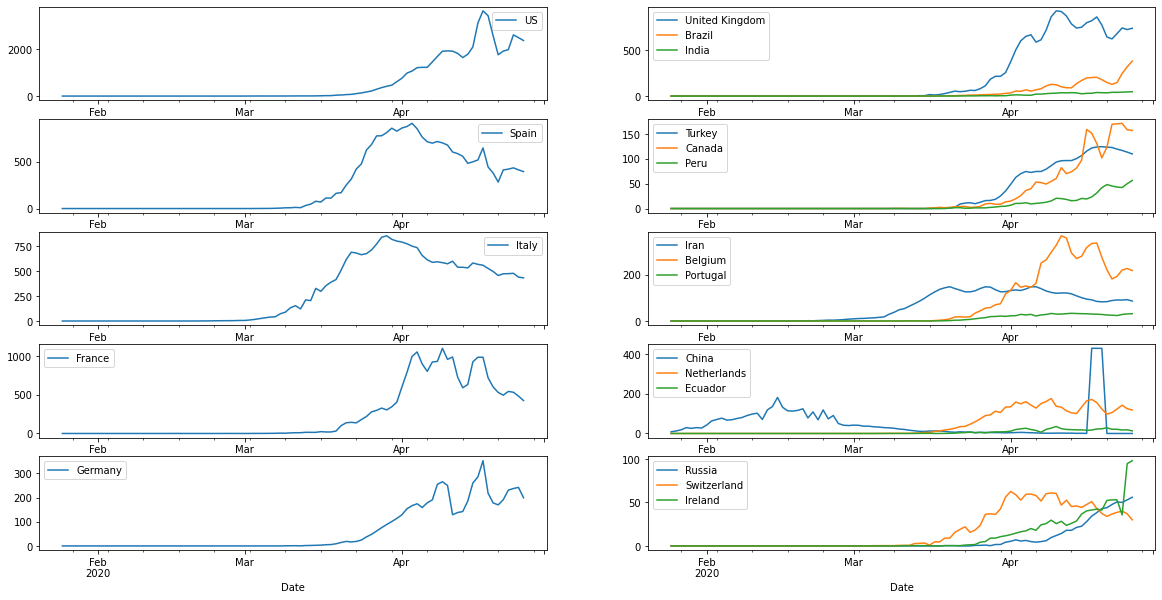

In [36]:
# 3 Day moving average of Death.
# Time series line plot of daily increases in death in top 10 cases- smoothed - 3 Day Moving Average - 3DMA    
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(20,10))
i=0;j=0;
for country in top_countries_list:
    if i==5 :
        i=0
        j=1
    df_grouped_death[country].diff().rolling(3).mean().plot.line(label= country ,ax=axes[i,j],legend=True)
    i=i+1;
plt.show()


In [37]:
#Observe the raw data and smoothed one .
df_grouped_death['US'].diff().rolling(3).mean().tail(5)

Date
2020-04-21    1926.666667
2020-04-22    1987.000000
2020-04-23    2620.000000
2020-04-24    2501.666667
2020-04-25    2377.666667
Name: Deaths, dtype: float64

In [38]:
df_grouped_death['US'].diff().tail(5)

Date
2020-04-21    2350.0
2020-04-22    2178.0
2020-04-23    3332.0
2020-04-24    1995.0
2020-04-25    1806.0
Name: Deaths, dtype: float64

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Text(0.5, 1.0, 'Actual Deaths vs Confirmed Case')

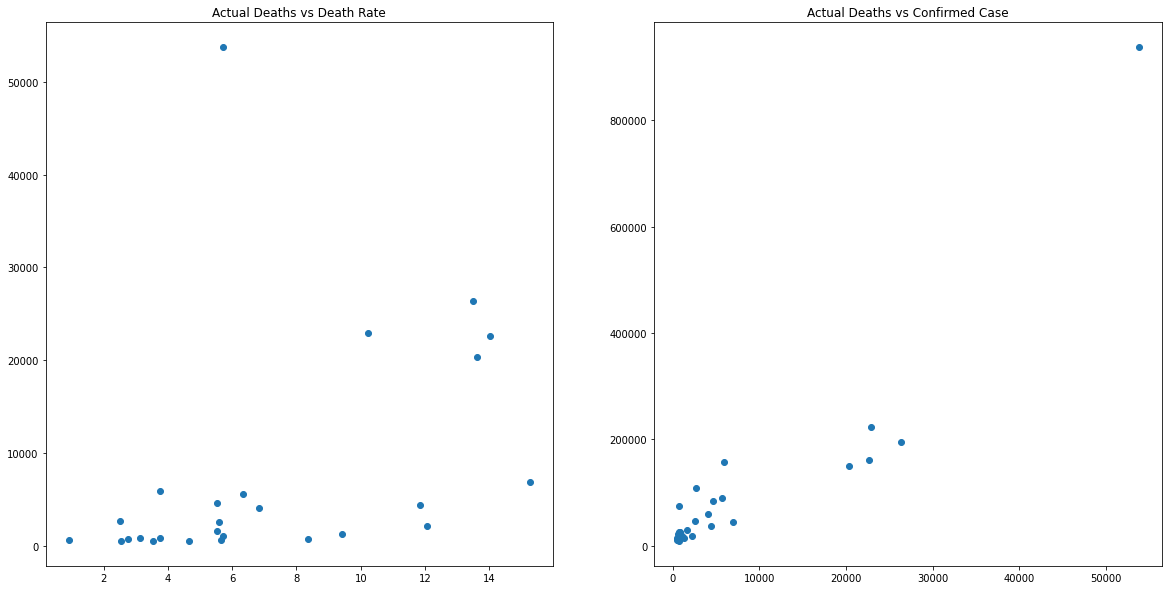

In [39]:
# On the latest date , calculate the death rate ie) Deaths vs confirmed 
# Scatter plot of confirmed Vs death 

df_lastday_details = pd.pivot_table(df_lastday,values=['Deaths','Confirmed'],index='Country/Region',aggfunc=np.sum)
df_lastday_details_gt_500 = df_lastday_details[df_lastday_details['Deaths'] > 500]
df_lastday_details_gt_500.loc[:,'DeathRate'] = (df_lastday_details_gt_500['Deaths']/df_lastday_details_gt_500['Confirmed'])*100;

#df_lastday_details_gt_500['DeathRate'] = (df_lastday_details_gt_500['Deaths']/df_lastday_details_gt_500['Confirmed'])*100;
#Above command throws settingwithcopywarning . Good article on how to deal with this warning 
#https://www.dataquest.io/blog/settingwithcopywarning/
    
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=False,figsize=(20,10))
ax1.scatter(df_lastday_details_gt_500['DeathRate'],df_lastday_details_gt_500['Deaths'])
ax1.set_title('Actual Deaths vs Death Rate')

ax2.scatter(df_lastday_details_gt_500['Deaths'],df_lastday_details_gt_500['Confirmed'])
ax2.set_title('Actual Deaths vs Confirmed Case')

#TODO how to put a legend for all the dots .